* 常態分布買入策略：

假設漲跌是依照常態分布，買入跌最多的股票，期待他未來會漲
但是現實中投資者情緒與市場事件導致價格不會絕對服從常態分布

In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

In [2]:
# 生成兩百支股票，504個交易日的漲跌
stock_cnt = 200
view_days = 504
stock_day_change = np.random.randn(200, 504)

In [3]:
# 資料存到/data裡面
np.save("data/stock_day_change.npy", stock_day_change)

In [15]:
# 常態分布買入策略範例

# 保留50天的隨機資料作為策略驗證
keep_days = 50

# 觀察454天的200支股票的總漲跌幅度，找出跌幅最大的三支股票
stock_day_change_test = stock_day_change[:stock_cnt, 0:view_days - keep_days]

print("跌幅最大的三支股票總漲跌幅度: ", np.sort(np.sum(stock_day_change_test, axis=1))[:3])

# 透過 np.argsort 找出跌幅最大的三支股票 index
stock_lower_array = np.argsort((np.sum(stock_day_change_test, axis=1)))[:3]
print("跌幅最大的三支股票 index: ", stock_lower_array)

跌幅最大的三支股票總漲跌幅度:  [-75.82588646 -54.85557397 -50.07132462]
跌幅最大的三支股票 index:  [ 40  90 144]


In [16]:
def analyze_stock(stock_day_change, stock_ind, view_days=504, keep_days=50):
    """
    可視化並計算選中股票的均值回復策略回測結果

    :param stock_day_change: ndarray，shape=(股票數, 天數)，日漲跌幅資料
    :param stock_ind: int，要查看的股票 index
    :param view_days: int，總觀察天數 (預設 504)
    :param keep_days: int，保留做回測驗證的天數 (預設 50)
    :return: float，回測期間的累計盈虧
    """

    # 取訓練期資料 (前 view_days - keep_days 天)
    stock_day_change_test = stock_day_change[:, :view_days - keep_days]

    # 計算該股票訓練期的累積走勢
    past_cum = stock_day_change_test[stock_ind].cumsum()

    # 取回測期資料 (最後 keep_days 天)
    cs_buy = stock_day_change[stock_ind][view_days - keep_days:view_days].cumsum()

    # 畫圖
    _, axs = plt.subplots(1, 2, figsize=(16, 5))

    # 前 454 天走勢
    axs[0].plot(np.arange(0, view_days - keep_days), past_cum)
    axs[0].set_title(f"Stock {stock_ind} - Past Trend (Train Window)")

    # 後 50 天回測走勢
    axs[1].plot(np.arange(view_days - keep_days, view_days), cs_buy)
    axs[1].set_title(f"Stock {stock_ind} - Test Performance (Buy & Hold)")

    plt.show()

    # 回傳第 50 天的總盈虧
    return cs_buy[-1]

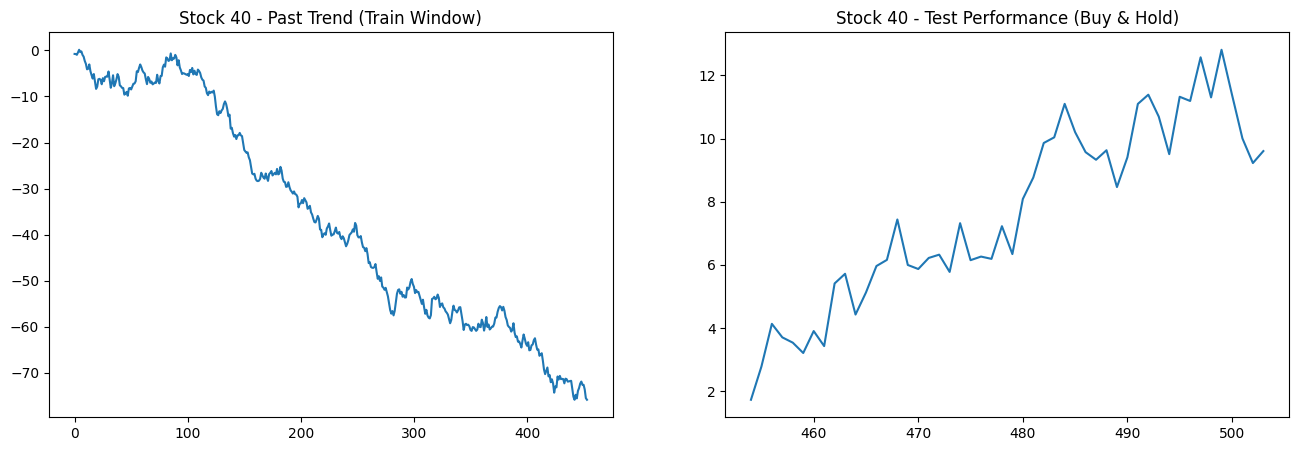

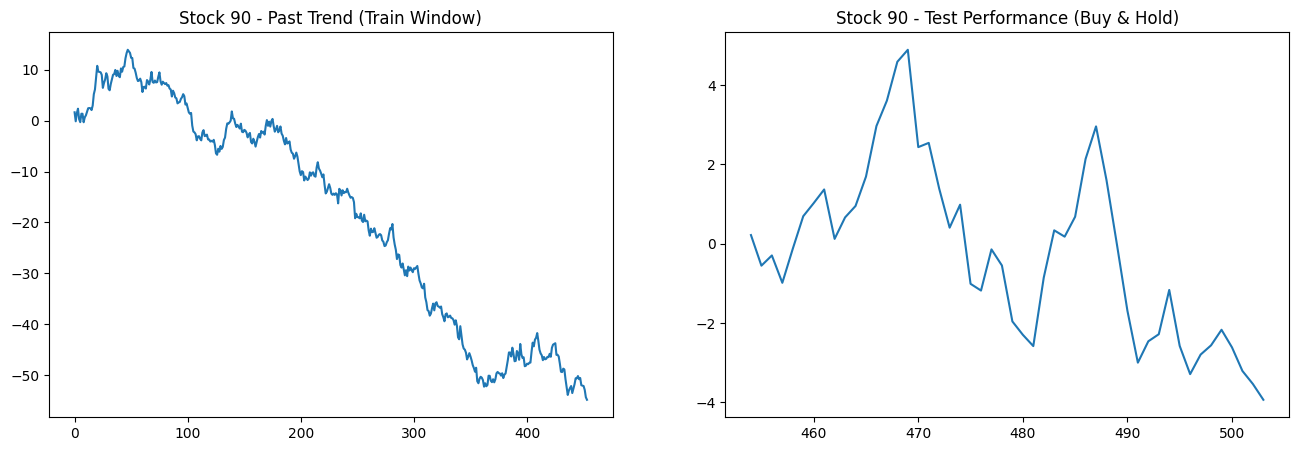

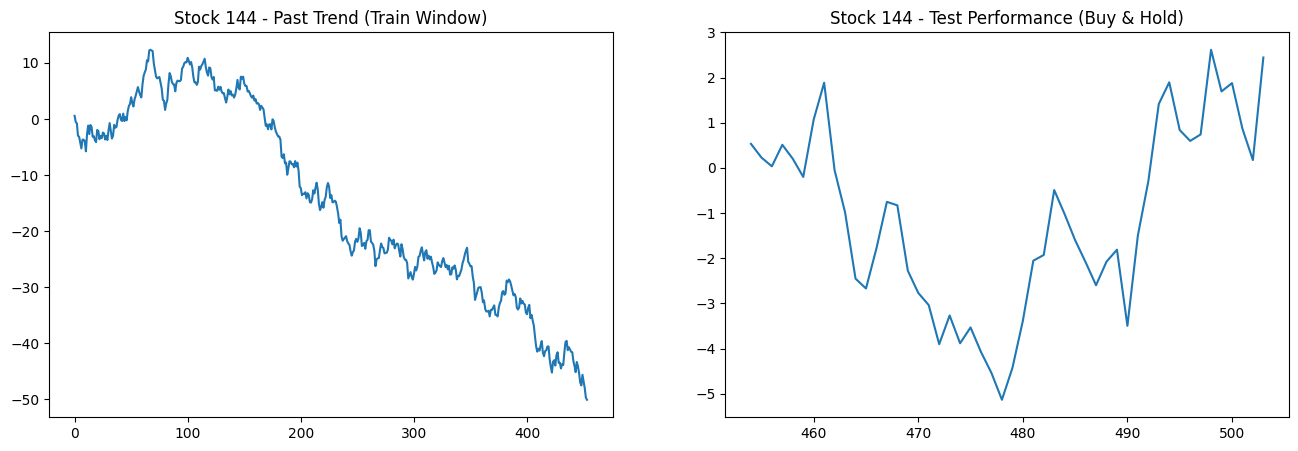

策略回測盈虧： 9.604129209625171 -3.9366066255349046 2.443432482462281


In [23]:
profit1 = analyze_stock(stock_day_change, stock_ind= stock_lower_array[0],
                       view_days=view_days, keep_days=keep_days)
profit2 = analyze_stock(stock_day_change, stock_ind= stock_lower_array[1],
                       view_days=view_days, keep_days=keep_days)
profit3 = analyze_stock(stock_day_change, stock_ind= stock_lower_array[2],
                       view_days=view_days, keep_days=keep_days)

print("策略回測盈虧：", profit1, profit2, profit3)